In [57]:
import pandas as pd
import numpy as np
train=pd.read_csv("Train_pjb2QcD.csv")
test=pd.read_csv("Test_wyCirpO.csv")
train['SOD']='TRAIN'
test['SOD']='TEST'
%matplotlib inline
print(train.shape)
print(test.shape)
test['Business_Sourced']=-1
data=train.append(test)


(9527, 24)
(5045, 23)


In [58]:
print(data.shape)

data.Manager_DoB=pd.DatetimeIndex(data.Manager_DoB)

date_stngs = ('2016-1-1')
current_date=pd.to_datetime(date_stngs)
data['Manager_Age']=(current_date-data.Manager_DoB).dt.days/365


(14572, 24)


In [59]:
data.Applicant_BirthDate=pd.DatetimeIndex(data.Applicant_BirthDate)

date_stngs = ('2016-1-1')
current_date=pd.to_datetime(date_stngs)
data['Applicant_Age']=(current_date-data.Applicant_BirthDate).dt.days/365


In [60]:
data.Application_Receipt_Date=pd.DatetimeIndex(data.Application_Receipt_Date)
date_stngs = ('2016-1-1')
current_date=pd.to_datetime(date_stngs)


data['Days']=(current_date-data.Application_Receipt_Date).dt.days

In [61]:
print(data.shape)

data.Manager_DOJ=pd.DatetimeIndex(data.Manager_DOJ)

date_stngs = ('2016-1-1')
current_date=pd.to_datetime(date_stngs)
data['Experience']=(current_date-data.Manager_DOJ).dt.days/365


(14572, 27)


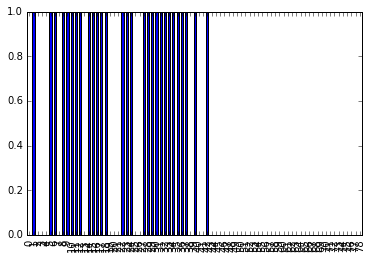

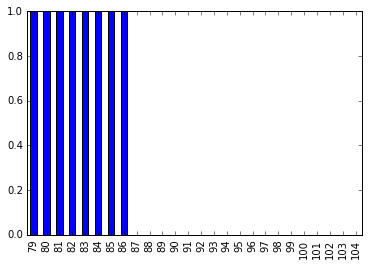

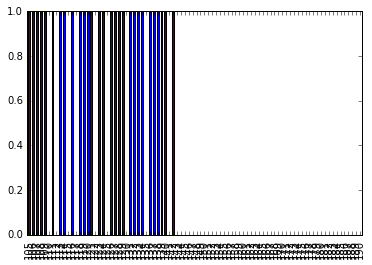

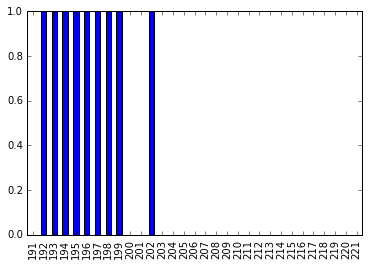

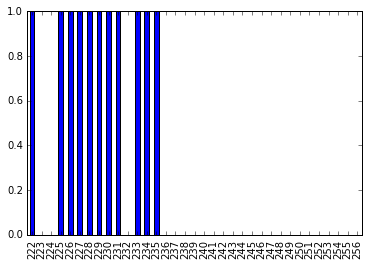

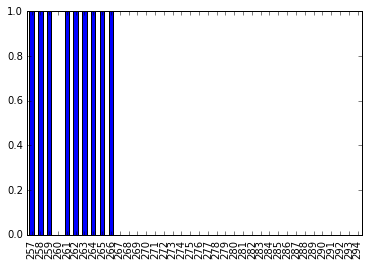

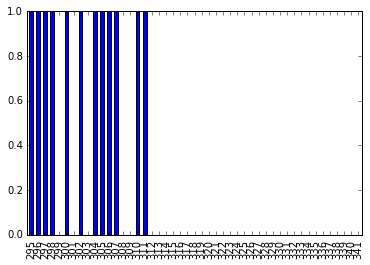

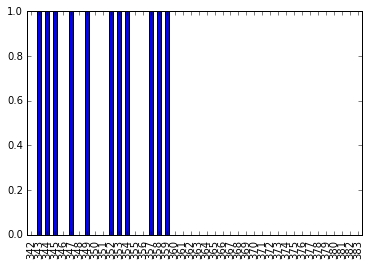

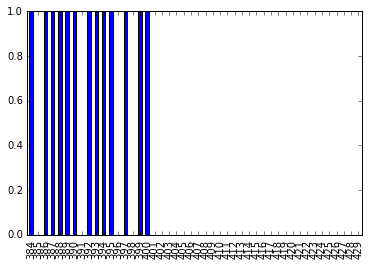

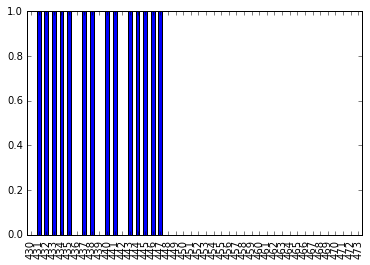

In [11]:
%matplotlib inline
ds=data.Days.unique()
ds[0:10]
#Data leak? all occur in the earlyu part of the month 
import matplotlib.pyplot as plt
for i in ds[0:10]:
    fig = plt.figure()
    (data.loc[data.Days==i,'Business_Sourced'].plot(kind='bar'))
    #name="File"+str(i)+".png"
    #fig.savefig(name)

In [62]:
data['order']=range(0,data.shape[0],1)

In [63]:
demean = lambda df: (df-df.mean())/df.std()
data['Order_Percentile']=data.groupby('Days')['order'].transform(demean)

In [64]:
data.Order_Percentile.describe()

count    1.456500e+04
mean     1.067156e-18
std      9.829639e-01
min     -1.722554e+00
25%     -8.498366e-01
50%      0.000000e+00
75%      8.498366e-01
max      1.722554e+00
Name: Order_Percentile, dtype: float64

In [84]:
import numpy as np
dt=['Manager_DOJ','Manager_DOB','Application_Receipt_Date','Applicant_BirthDate']
for f in data.columns:
        # fill NaN values with mean
    if data[f].dtype == 'float64':
        data[f][np.isnan(data[f])] = data[f].mean()
        
    # fill NaN values with most occured value
    elif data[f].dtype == 'object':
        data[f][data[f] != data[f]] = data[f].value_counts().index[0]


C:\Users\toshiba\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\toshiba\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [85]:
data.isnull().sum()

Applicant_BirthDate              96
Applicant_City_PIN                0
Applicant_Gender                  0
Applicant_Marital_Status          0
Applicant_Occupation              0
Applicant_Qualification           0
Application_Receipt_Date          0
Business_Sourced                  0
ID                                0
Manager_Business                  0
Manager_Business2                 0
Manager_Current_Designation       0
Manager_DOJ                    1507
Manager_DoB                    1507
Manager_Gender                    0
Manager_Grade                     0
Manager_Joining_Designation       0
Manager_Num_Application           0
Manager_Num_Coded                 0
Manager_Num_Products              0
Manager_Num_Products2             0
Manager_Status                    0
Office_PIN                        0
SOD                               0
Manager_Age                       0
Applicant_Age                     0
Days                              0
Experience                  

In [86]:
data.dtypes

Applicant_BirthDate            datetime64[ns]
Applicant_City_PIN                    float64
Applicant_Gender                        int64
Applicant_Marital_Status                int64
Applicant_Occupation                    int64
Applicant_Qualification                 int64
Application_Receipt_Date       datetime64[ns]
Business_Sourced                        int64
ID                                     object
Manager_Business                      float64
Manager_Business2                     float64
Manager_Current_Designation             int64
Manager_DOJ                    datetime64[ns]
Manager_DoB                    datetime64[ns]
Manager_Gender                          int64
Manager_Grade                         float64
Manager_Joining_Designation             int64
Manager_Num_Application               float64
Manager_Num_Coded                     float64
Manager_Num_Products                  float64
Manager_Num_Products2                 float64
Manager_Status                    

In [87]:
from sklearn.preprocessing import LabelEncoder
for i in data.columns:
    if i=='ID' or i=='SOD' or i=='Business_Sourced':
        continue
    if data[i].dtype=='object':
        le = LabelEncoder()

        data[i] = le.fit_transform(data[i])
   

In [88]:
data.Order_Percentile.describe()

count    1.457200e+04
mean     1.066643e-18
std      9.827278e-01
min     -1.722554e+00
25%     -8.498366e-01
50%      0.000000e+00
75%      8.498366e-01
max      1.722554e+00
Name: Order_Percentile, dtype: float64

In [89]:
X_target=data.Business_Sourced
train=data[data.SOD=='TRAIN']
test=data[data.SOD=='TEST']
train.shape

(9527, 30)

In [90]:
test.shape

(5045, 30)

In [104]:
data.corr().Business_Sourced*100


Applicant_City_PIN               5.250803
Applicant_Gender                -3.087341
Applicant_Marital_Status        13.629723
Applicant_Occupation            -4.792148
Applicant_Qualification        -13.301002
Business_Sourced               100.000000
Manager_Business                12.440538
Manager_Business2               14.376360
Manager_Current_Designation      5.484572
Manager_Gender                   9.238286
Manager_Grade                   -0.503134
Manager_Joining_Designation     -7.040504
Manager_Num_Application        -10.949745
Manager_Num_Coded               -9.439477
Manager_Num_Products            15.653299
Manager_Num_Products2           17.475663
Manager_Status                   2.040759
Office_PIN                       4.891615
Manager_Age                      8.894264
Applicant_Age                    1.222027
Days                            66.410431
Experience                      20.595194
order                          -68.599914
Order_Percentile               -25

In [115]:
cols=['order','Order_Percentile','Experience','Days','Applicant_Age',
      'Manager_Age','Office_PIN','Manager_Status','Manager_Num_Products',
      'Manager_Num_Products2',"Manager_Num_Coded","Manager_Num_Application",
      "Manager_Joining_Designation","Manager_Grade","Manager_Gender",
      "Manager_Current_Designation","Manager_Business","Manager_Business2"
     ,"Applicant_City_PIN","Applicant_Gender","Applicant_Marital_Status",
     "Applicant_Occupation","Applicant_Qualification"]

from sklearn.ensemble import RandomForestClassifier
X = train[cols]
Y = train["Business_Sourced"]
rf = RandomForestClassifier()
rf.fit(X, Y)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), cols), 
             reverse=True))

Features sorted by their score:
[(0.4032, 'Order_Percentile'), (0.0702, 'order'), (0.0598, 'Applicant_Age'), (0.0553, 'Applicant_City_PIN'), (0.0509, 'Days'), (0.0456, 'Office_PIN'), (0.0449, 'Experience'), (0.0442, 'Manager_Age'), (0.0303, 'Manager_Business2'), (0.0262, 'Manager_Business'), (0.0226, 'Manager_Num_Application'), (0.0204, 'Manager_Num_Products'), (0.0196, 'Applicant_Occupation'), (0.0195, 'Manager_Num_Products2'), (0.0139, 'Applicant_Qualification'), (0.0137, 'Manager_Grade'), (0.0121, 'Manager_Num_Coded'), (0.0111, 'Manager_Current_Designation'), (0.01, 'Applicant_Gender'), (0.0097, 'Applicant_Marital_Status'), (0.0094, 'Manager_Joining_Designation'), (0.0052, 'Manager_Gender'), (0.0025, 'Manager_Status')]


In [118]:
df=(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), cols), 
             reverse=True))
col_req=[]
for i in df:
    if i[0]>=0.01:
        col_req.append(i[1])

In [124]:
predictor_var=col_req 
#XGBoost 
import sys
sys.path.append("C:\\Users\\toshiba\\xgboost\\python-package")
import xgboost as xgb
from sklearn import metrics
import matplotlib.pyplot as plt


In [120]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    target="Business_Sourced"
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,
            metrics=['auc'], early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob)
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return alg




Model Report
Accuracy : 0.9115
AUC Score (Train): 0.974898


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=204, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

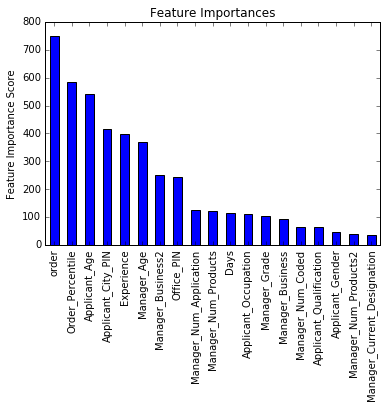

In [121]:
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

alg=modelfit(xgb1, train, predictor_var)

In [130]:
pred=alg.predict_proba(test.loc[:,predictor_var])

In [131]:
df=pd.DataFrame({'ID':test.ID,'Prediction':pred[:,1]})

In [132]:
df.columns=['ID','Business_Sourced']
df.to_csv("output1.csv",index=False)